In [5]:
import numpy  as np
import pandas as pd
import json

# K-Means
from sklearn import cluster

# Visualization and Analysis
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score

In [6]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [7]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

,CMCSA,SIRI,CZR,F,NKE,GM,LOW,FOXA,MAT,MIK,...,RMBL,SAUC,SGA,SHSP,SYPR,TKAT,UONE,VNCE,WINA,XELB
0,6.323475,0.030446,0.216274,10.992098,2.202412,10.049664,4.487542,0.341232,-0.058619,0.001460,...,-0.367710,-0.367941,-0.369949,-0.377479,-0.372563,-0.378199,-0.347661,-0.359470,-0.373659,-0.376286
1,-0.316696,-0.108048,0.061176,12.854323,1.530728,11.699469,3.857429,0.271216,-0.071216,-0.024487,...,-0.303703,-0.304949,-0.308225,-0.316172,-0.309429,-0.316463,-0.305365,-0.303067,-0.316273,-0.316451
2,16.416107,0.288030,0.420518,2.262109,2.501254,2.171589,3.648794,0.320963,-0.006632,0.051844,...,-0.323020,-0.321154,-0.319749,-0.322982,-0.323917,-0.324211,-0.269683,-0.303684,-0.313241,-0.319455
3,-0.158625,0.791809,-0.158625,-0.158625,-0.158625,-0.158625,-0.158625,-0.158625,-0.158625,-0.158625,...,-0.158625,-0.158625,-0.158625,-0.125472,-0.158625,-0.158625,-0.158625,-0.158625,-0.158625,-0.158625
4,17.261727,0.060087,0.271835,2.793410,2.822662,2.318617,3.617053,0.032407,0.255593,0.081539,...,-0.285551,-0.292812,-0.291969,-0.290590,-0.292209,-0.291735,-0.244763,-0.257098,-0.287993,-0.288419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,7.256458,0.919989,-0.098078,1.167930,5.339784,1.988695,3.798884,0.832965,-0.151853,-0.094441,...,-0.315644,-0.318958,-0.310897,-0.315197,-0.319687,-0.320130,-0.315699,-0.316220,-0.290164,-0.319493
58,9.706136,0.897186,0.505200,5.422933,4.032573,4.455106,3.506901,0.493709,-0.114403,-0.068070,...,-0.326700,-0.325426,-0.325908,-0.328350,-0.331860,-0.332647,-0.294470,-0.327465,-0.308479,-0.331265
59,-4.157145,-1.822499,-0.059603,12.746919,5.949899,-4.966444,0.220146,2.360806,0.500011,0.249440,...,-0.234379,-0.252915,-0.209054,-0.234064,-0.228805,-0.234363,-0.197830,-0.215203,-0.231966,-0.234695
60,0.272457,0.101756,1.295726,0.155944,0.359933,-0.039324,0.265534,-0.272463,0.369385,-0.937697,...,-1.626023,-0.341613,-0.344355,-0.453805,-0.607241,-0.732742,-0.315203,0.862381,0.166098,0.181333


C:\Users\jkeho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\jkeho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\jkeho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\jkeho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\jkeho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWar

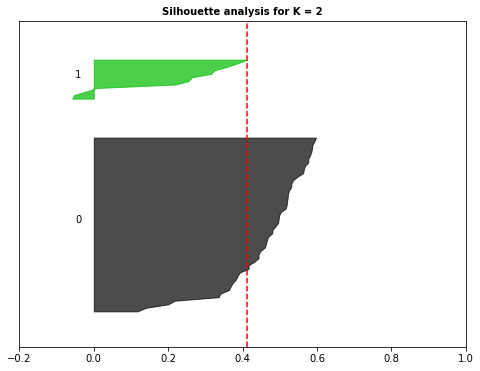

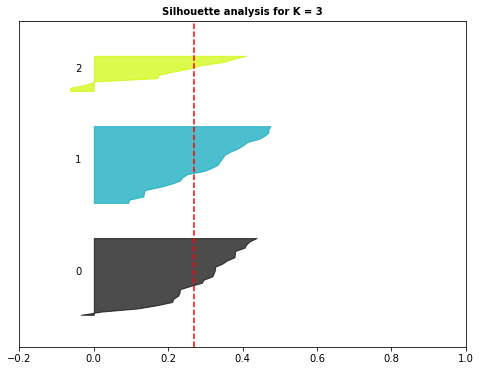

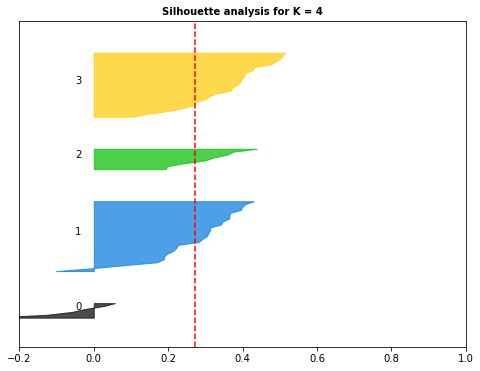

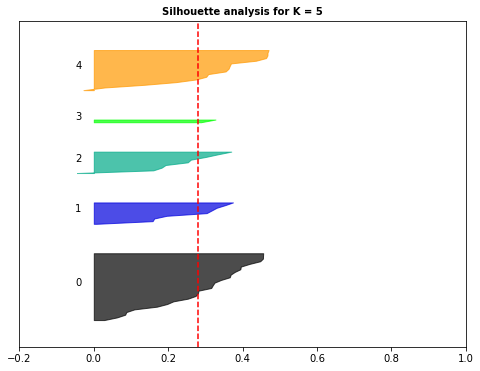

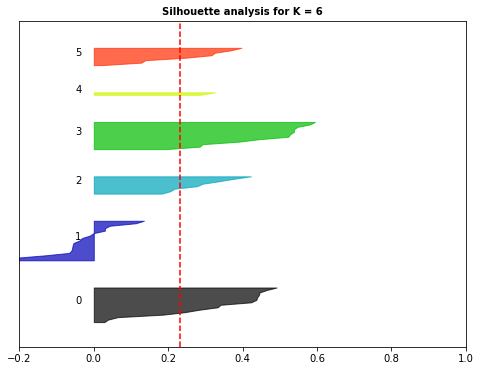

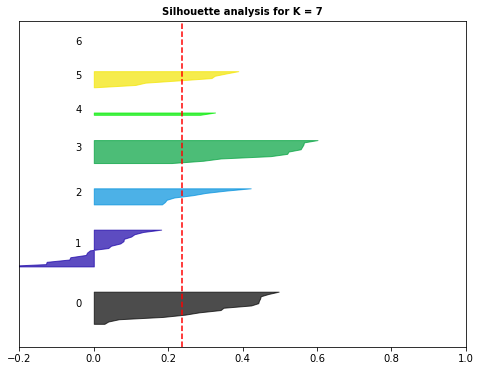

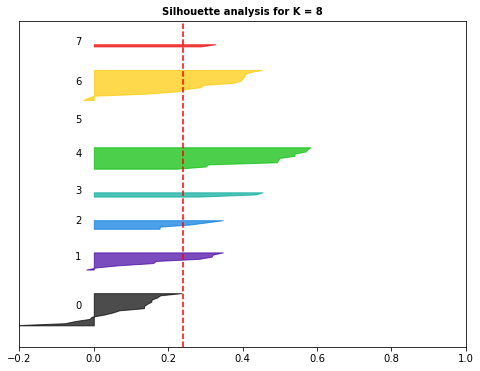

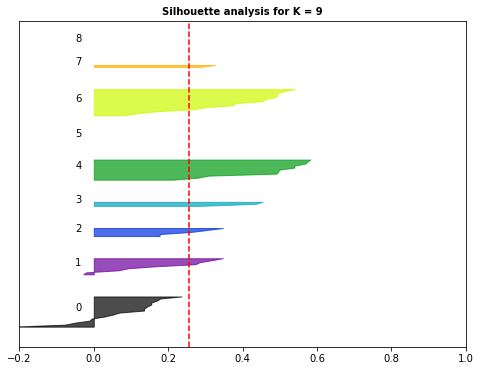

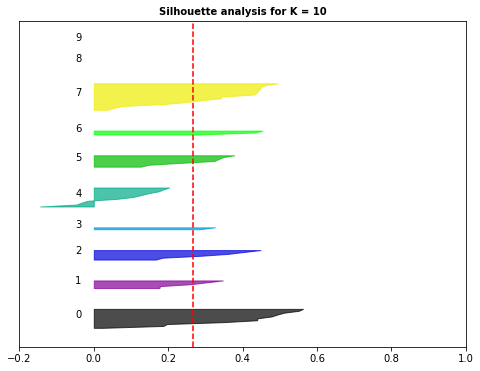

In [8]:
df = pd.read_csv("../processed_data/2018_Data_Accounts_Reverse.csv")

# convert 'Name' column into row indices
#df.set_index('Ticker', inplace=True)

# remove ticker column
df = df.drop(columns=['Ticker'])

# display
display(df)

k = 10
kmeans_results = run_KMeans(k, df)

# Plotting Silhouette Analysis
silhouette(kmeans_results, df, plot=True)

In [9]:
def get_top_features_cluster(tf_idf_array, idx, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster 
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores        
        best_features = [(idx[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotFeats(dfs, n_feats):
    plt.figure(figsize=(10, 6))
    for i in range(0, len(dfs)):
        plt.title(("Features in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

In [10]:
best_result = 8
kmeans = kmeans_results.get(best_result)

df_array = df.to_numpy()
dfi = df.index.to_numpy()

prediction = kmeans.predict(df)
n_feats = 20
dfs = get_top_features_cluster(df_array, dfi, prediction, n_feats)
plotFeats(dfs, 20)

IndexError: index 240 is out of bounds for axis 0 with size 62